In [8]:
from libsonyapi.camera import Camera
from libsonyapi.actions import Actions
import time 
from time import sleep
import cv2 
import matplotlib as plt
import pyfirmata
from pyfirmata import util
import signal
import serial
import sys 

from pyfirmata import Arduino, util
from time import sleep
import os

board = Arduino('COM7') # Change to your port
it = util.Iterator(board)
it.start()
board.analog[0].enable_reporting()
print ("Read Start")
for i in range(10):
    time.sleep(1)
    print(board.analog[0].read())

board.analog[0].disable_reporting()



Read Start
0.0
0.0
0.219
0.219
0.219
0.219
0.219
0.219
0.0
0.0


Exception in thread Thread-18:
Traceback (most recent call last):
  File "C:\Users\asenn\pyversion\py37\lib\threading.py", line 926, in _bootstrap_inner
    self.run()
  File "c:\Users\asenn\pycode\pyprojects\sony_imaging_project\.venv.sony_imaging_project\lib\site-packages\pyfirmata\util.py", line 55, in run
    self.board.iterate()
  File "c:\Users\asenn\pycode\pyprojects\sony_imaging_project\.venv.sony_imaging_project\lib\site-packages\pyfirmata\pyfirmata.py", line 282, in iterate
    received_data.append(ord(self.sp.read()))
TypeError: ord() expected a character, but string of length 0 found



In [11]:
# Trying to test motor at slowest speed 
from libsonyapi.camera import Camera
from libsonyapi.actions import Actions
import time 
from time import sleep
import cv2 
import matplotlib as plt
import pyfirmata
from pyfirmata import util

# Configure port
board = pyfirmata.Arduino('COM7')
# Name pins
speed_pin = 5
direction1 = 4
direction2 = 3
voltage_read_pin = 0

# Motor Pins
# Assign mode attribute to Arduino pins 
board.digital[direction2].mode = pyfirmata.OUTPUT
board.digital[direction1].mode = pyfirmata.OUTPUT
board.digital[speed_pin].mode = pyfirmata.PWM

# Voltage reading pin
board.analog[voltage_read_pin].mode = pyfirmata.INPUT
def motor_on(seconds = 3, speed = 1):
    # sourcery skip: extract-duplicate-method
    """
    Controls the motor speed from 0-1 using PWM
    and takes a photo by communicating with the a6000
    """
    # Turn on the motor for three seconds 
    current_time = time.monotonic()
    future_time = time.monotonic() + seconds
    while future_time > current_time:
     #  print(time.monotonic())
        board.digital[direction1].write(1)
        board.digital[direction2].write(0)
        board.digital[speed_pin].write(speed)
        current_time = time.monotonic()

   
    # Turn off the motor 
    board.digital[direction1].write(1)
    board.digital[direction2].write(0)
    board.digital[speed_pin].write(0)

def wait(seconds = 3):
    """
    Tells the motor to pause using monotonic time
    """
    current_time = time.monotonic()
    future_time = time.monotonic() + seconds
    while future_time > current_time:
        current_time = time.monotonic()


motor_on(seconds = 3, speed = .5)
wait(seconds = 1)
motor_on(seconds = 3, speed = .5)
wait(seconds = 1)

Number of lines detected: 35


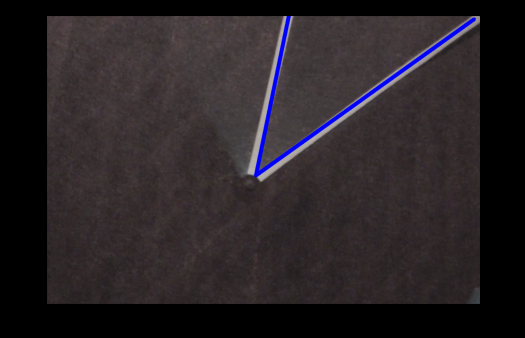

In [1]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.axes_grid1 import ImageGrid

# Create list where all images are stores 
image_list = []

# Loading image from file path
test_image = cv.imread(filename = r"D:\DCIM\16330413\DSC01956.JPG")

# Resize image to (800, 1200)
# Note that camera has 24 MP resolution which is too high
scale  = 0.2
width = int(test_image.shape[1] * scale)
height = int(test_image.shape[0] * scale)
dim = (width, height)
test_image = cv.resize(test_image, dim)

# Store original resized image in list 
image_list.append(test_image)

# Convert image to grayscale 
test_image_gray = cv.cvtColor(test_image, cv.COLOR_BGR2GRAY)


# Binarize image
test_image_bin = cv.threshold(test_image_gray, 120, 255, cv.THRESH_BINARY)[1]


# Need to find edges for line detection 
edges = cv.Canny(test_image_bin, 200, 500, apertureSize=3)

# Now implement edge detection
minLineLength = 100
maxLineGap = 5

#! Test to see which threshold value yields max number of lines detected
# threshold_xvals = []
# threshold_yvals = []
# for i in range(10,500):
#     lines = cv.HoughLinesP(test_image_bin, rho = 1,theta = 1*np.pi/180,threshold = i + 1, minLineLength = 400, maxLineGap = 1)
#     threshold_xvals.append(i)
#     threshold_yvals.append(len(lines))
# plt.plot(threshold_xvals, threshold_yvals)
# plt.show()

lines_list = cv.HoughLinesP(test_image_bin, rho = 1,theta = 1*np.pi/180,threshold = 400, minLineLength = 400, maxLineGap = 1)


# Make list for each value for analyis
x1_list = []
y1_list = []
x2_list_line1 = [] 
y2_list_line1 = []
x2_list_line2 = [] 
y2_list_line2 = []

# Use these values to delineate x2, y2 points of lines 
# First three values for first line
x2_comparison_line1 = (lines_list[0][0][2]+lines_list[1][0][2] + lines_list[2][0][2]) / 3
y2_comparison_line1 = (lines_list[0][0][3]+lines_list[1][0][3] + lines_list[2][0][3]) / 3

x2_comparison_line2 = (lines_list[-1][0][2]+lines_list[-2][0][2] + lines_list[-3][0][2]) / 3
y2_comparison_line2 = (lines_list[-1][0][3]+lines_list[-2][0][3] + lines_list[-3][0][3]) / 3

for i in range(len(lines_list)):
    x1, y1, x2, y2 = lines_list[i][0]
    # print(lines_list[i][0])
   
    # First start point for both lines 
    x1_list.append(lines_list[i][0][0])
    y1_list.append(lines_list[i][0][1])

    # Comparison needs to be made to delineate second points
    # Line 1 delineation
    if abs(lines_list[i][0][2] - x2_comparison_line1) < 200:
        x2_list_line1.append(lines_list[i][0][2])
        y2_list_line1.append(lines_list[i][0][3])

    elif abs(lines_list[i][0][2] - x2_comparison_line2) < 200:
        x2_list_line2.append(lines_list[i][0][2])
        y2_list_line2.append(lines_list[i][0][3])


# Define function to take average of lists 
def average(list):
    return sum(list)/len(list)

# First point for both lines 
x1_average = average(x1_list)
y1_average = average(y1_list)

x2_line1 = average(x2_list_line1)
y2_line1 = average(y2_list_line1)
x2_line2 = average(x2_list_line2)
y2_line2 = average(y2_list_line2)

# Highlight average line #1
cv.line(test_image, (int(x1_average), int(y1_average)), (int(x2_line1), int(y2_line1)), (0, 0, 255), 10)

# Highlight line #2 using average values
cv.line(test_image, (int(x1_average), int(y1_average)), (int(x2_line2), int(y2_line2)), (0, 0, 255), 10)
print(f"Number of lines detected: {len(lines_list)}")

# Create a figure
fig = plt.figure(figsize=(6, 6), facecolor="Black")
grid = ImageGrid(fig, 111,  # similar to subplot(111)
                 nrows_ncols=(1,4),  # creates 2x2 grid of axes
                 axes_pad=0.1,  # pad between axes in inch.
                 )


for ax, image in zip(grid, image_list):
    # Iterating over the grid returns the Axes.
    ax.imshow(image, cmap = 'gray')

# Show the finished plot 
plt.show()




In [45]:
import numpy as np 

line_1 = np.array([-1,5,0,1])
line_2 = np.array([0,2,13,2])

point_differences = []

#! Important that we have points in form with center first so do product is accurate 
#! ... goal is to have array for each line as np.array([xc, yc, x1, y1])



# Start with point 1 of first line, subtract with point 1 of second and then point 2 of second 
point_differences.append(np.sum(np.abs(line_1[:2] - line_2[:2])))
point_differences.append(np.sum(np.abs(line_1[:2] - line_2[2:])))
# Start with point 2 of second line, subtract with point 1 of second and then point 2 of second
point_differences.append(np.sum(np.abs(line_1[2:] - line_2[:2])))
point_differences.append(np.sum(np.abs(line_1[2:] - line_2[2:])))

print(point_differences)

# find which condition in the list sets center points based on least value in point_differences[] 
point_differences.index(min(point_differences))
# Set point types based off of point_differences (identify center)

# This is where first two points are already center points for both lines 
if point_differences.index(min(point_differences)) == 0:
    # do nothing, points are already in correct np.array([xc, yc, x1, y1]) form
    pass

elif point_differences.index(min(point_differences)) == 1:
    # first line is in correct form, but second needs to switch first point
   line_2 = np.append(line_2[2:], line_2[:2])

elif point_differences.index(min(point_differences)) == 2:
    # second line is in correct form, but first line needs to switch first point
    line_1 = np.append(line_1[2:], line_1[2:])

elif point_differences.index(min(point_differences)) == 3:
    # Both lines need to be switched and redefined
    line_1 = np.append(line_1[2:], line_1[:2])
    line_2 = np.append(line_2[2:], line_2[:2])

line_1 = np.append(line_1[2:], line_1[:2])

print(f"Condition {point_differences.index(min(point_differences))} satisfied. Line 1 is: {line_1} and line 2 is: {line_2}")

[4, 17, 1, 14]
Condition 2 satisfied. Line 1 is: [0 1 0 1] and line 2 is: [ 0  2 13  2]
